In [47]:
import numpy as np
import os
from nilearn import plotting
import nibabel as nib
from transformation import apply_transformations

In [48]:
folder_image = '/home/jupyter/ai_postgraduate_project/data/resized_dataset/imagesTr'
folder_target = '/home/jupyter/ai_postgraduate_project/data/resized_dataset/labelsTr'

In [49]:
list_images = os.listdir(folder_image)
list_choices = np.random.choice(list_images, 40, list_images)

In [50]:
for i, im in enumerate(list_choices):
    print("Processing image " + str(i+1) + ' -----------------------------------')
    path_image = os.path.join(folder_image, im)
    path_target = os.path.join(folder_target, im)
    
    image_nii =  nib.load(path_image)
    target_nii =  nib.load(path_target)
    
    image = np.array(image_nii.dataobj)
    target = np.array(target_nii.dataobj)
    
    image_tr, target_tr = apply_transformations(
        image,
        target,
        apply_flip_axis_x = True,
        apply_flip_axis_y = True,
        apply_flip_axis_z = True,
        apply_gaussian_offset = True,
        apply_gaussian_noise = True,
        apply_elastic_transfor = True,
        sigma_gaussian_offset = None,
        sigma_gaussian_noise = None,
        alpha_elastic = None,
        sigma_elastic = None
    )
    
    image_tr_niigz = nib.Nifti1Image(image_tr, affine=np.eye(4))
    target_tr_niigz = nib.Nifti1Image(target_tr, affine=np.eye(4))
    
    nib.save(image_nii, os.path.join(os.getcwd(), 'sample_transf', 'image_' + im))
    nib.save(image_tr_niigz, os.path.join(os.getcwd(), 'sample_transf', 'image_trans_' + im))
    
    nib.save(target_nii, os.path.join(os.getcwd(), 'sample_transf', 'target_' + im))
    nib.save(target_tr_niigz, os.path.join(os.getcwd(), 'sample_transf', 'target_trans_' + im))
    

Processing image 1 -----------------------------------
Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation
Processing image 2 -----------------------------------
Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation
Processing image 3 -----------------------------------
Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation
Processing image 4 -----------------------------------
Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation
Processing image 5 -----------------------------------
Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation
Proce

In [4]:
saved_path = os.path.join(os.getcwd(), "sample_transf")

In [5]:
image_saved = os.listdir(saved_path)

['image_transpancreas_056.nii.gz',
 'target_trans_pancreas_377.nii.gz',
 'target_pancreas_104.nii.gz',
 'target_trans_pancreas_333.nii.gz',
 'target_pancreas_165.nii.gz',
 'target_pancreas_333.nii.gz',
 'image_pancreas_382.nii.gz',
 'target_pancreas_225.nii.gz',
 'image_pancreas_217.nii.gz',
 'image_pancreas_056.nii.gz',
 'image_pancreas_334.nii.gz',
 'image_transpancreas_032.nii.gz',
 'target_pancreas_056.nii.gz',
 'image_transpancreas_165.nii.gz',
 'image_pancreas_165.nii.gz',
 'image_pancreas_225.nii.gz',
 'target_trans_pancreas_382.nii.gz',
 'image_transpancreas_382.nii.gz',
 'image_transpancreas_333.nii.gz',
 'image_transpancreas_334.nii.gz',
 'image_pancreas_032.nii.gz',
 'target_pancreas_377.nii.gz',
 'target_trans_pancreas_225.nii.gz',
 'target_trans_pancreas_217.nii.gz',
 'image_transpancreas_104.nii.gz',
 'target_pancreas_382.nii.gz',
 'target_trans_pancreas_104.nii.gz',
 'target_pancreas_032.nii.gz',
 'target_pancreas_334.nii.gz',
 'target_trans_pancreas_032.nii.gz',
 'image

In [59]:
image_name = 'pancreas_405.nii.gz'

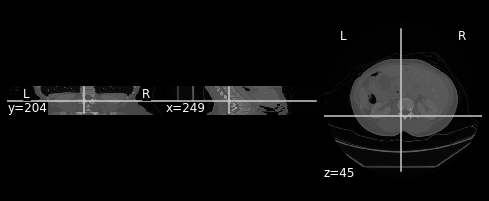

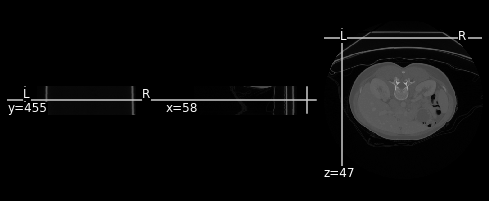

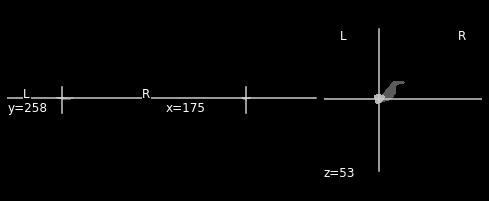

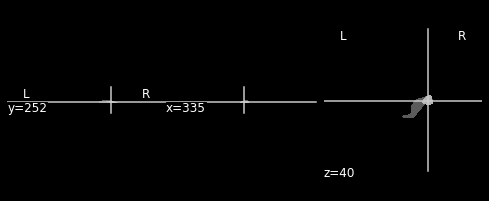

In [60]:
img = nib.load(os.path.join(saved_path, 'image_' + image_name))
img_trans = nib.load(os.path.join(saved_path, 'image_trans_' + image_name))
tgt = nib.load(os.path.join(saved_path, 'target_' + image_name))
tgt_trans = nib.load(os.path.join(saved_path, 'target_trans_' + image_name))
plotting.plot_anat(img)
plotting.plot_anat(img_trans)
plotting.plot_anat(tgt)
plotting.plot_anat(tgt_trans)